# Importing Libraries #

In [20]:
import pandas as pd
import json
import os
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Creating paths to import our images from our Dataset

In [2]:
test_file_path = 'similar/test_similar_small.json'
train_file_path = 'similar/train_similar_small.json'
base_path = r'Data'

full_test_path = os.path.abspath(os.path.join(base_path, test_file_path))
full_train_path = os.path.abspath(os.path.join(base_path, train_file_path))
print(full_test_path)

/Users/josephnyembo/documents!/DeepfakeDetection/Data/similar/test_similar_small.json


In [3]:
with open(full_test_path) as f:
    json_data = json.load(f)
json_data.items()

dict_items([('inpainting', {'0': {'original': 'similar/inpainting/0/original.png', 'mask': 'similar/inpainting/0/mask.png', 'generated': 'similar/inpainting/0/inpainting.png'}, '1': {'original': 'similar/inpainting/3/original.png', 'mask': 'similar/inpainting/3/mask.png', 'generated': 'similar/inpainting/3/inpainting.png'}, '2': {'original': 'similar/inpainting/6/original.png', 'mask': 'similar/inpainting/6/mask.png', 'generated': 'similar/inpainting/6/inpainting.png'}, '3': {'original': 'similar/inpainting/7/original.png', 'mask': 'similar/inpainting/7/mask.png', 'generated': 'similar/inpainting/7/inpainting.png'}, '4': {'original': 'similar/inpainting/8/original.png', 'mask': 'similar/inpainting/8/mask.png', 'generated': 'similar/inpainting/8/inpainting.png'}, '5': {'original': 'similar/inpainting/13/original.png', 'mask': 'similar/inpainting/13/mask.png', 'generated': 'similar/inpainting/13/inpainting.png'}, '7': {'original': 'similar/inpainting/15/original.png', 'mask': 'similar/in

In [4]:
# DataFrame oluşturma
data_list = []

for category, items in json_data.items():
    for item_id, subItems in items.items():
        original_path = subItems["original"]
        generated_path = subItems["generated"]

        # category kontrolü 1 for style_transfer, 0 for inpainting
        style_transfer = 1 if category == "style_transfer" else 0

        # Original resim
        data_list.append({
            "image": original_path,
            "category": style_transfer,
            "original": 1,
            "generated": 0
        })

        # Generated resim
        data_list.append({
            "image": generated_path,
            "category": style_transfer,
            "original": 0,
            "generated": 1
        })

# DataFrame oluşturma
test_df = pd.DataFrame(data_list)
test_df

,image,category,original,generated
0,similar/inpainting/0/original.png,0,1,0
1,similar/inpainting/0/inpainting.png,0,0,1
2,similar/inpainting/3/original.png,0,1,0
3,similar/inpainting/3/inpainting.png,0,0,1
4,similar/inpainting/6/original.png,0,1,0
...,...,...,...,...
91,similar/cutmix/012_generated.png,0,0,1
92,similar/cutmix/013_source_1.png,0,1,0
93,similar/cutmix/013_generated.png,0,0,1
94,similar/cutmix/014_source_1.png,0,1,0


In [5]:
with open(full_train_path) as f:
    json_data = json.load(f)
#json_data.items()

In [6]:
# DataFrame oluşturma
data_list = []

for category, items in json_data.items():
    for item_id, subItems in items.items():
        original_path = subItems["original"]
        generated_path = subItems["generated"]

        # category kontrolü 1 for style_transfer, 0 for inpainting
        style_transfer = 1 if category == "style_transfer" else 0

        # Original resim
        data_list.append({
            "image": original_path,
            "category": style_transfer,
            "original": 1,
            "generated": 0
        })

        # Generated resim
        data_list.append({
            "image": generated_path,
            "category": style_transfer,
            "original": 0,
            "generated": 1
        })

# DataFrame oluşturma
train_df = pd.DataFrame(data_list)
train_df

,image,category,original,generated
0,similar/inpainting/14/original.png,0,1,0
1,similar/inpainting/14/inpainting.png,0,0,1
2,similar/inpainting/22/original.png,0,1,0
3,similar/inpainting/22/inpainting.png,0,0,1
4,similar/inpainting/29/original.png,0,1,0
...,...,...,...,...
147,similar/cutmix/013_generated.png,0,0,1
148,similar/cutmix/014_source_2.png,0,1,0
149,similar/cutmix/014_generated.png,0,0,1
150,similar/cutmix/015_source_1.png,0,1,0


In [7]:
total_images = test_df.shape[0] + train_df.shape[0]
total_images

248

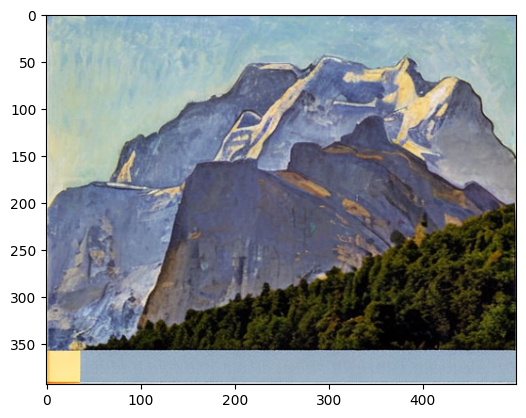

In [8]:

#import cv2, numpy and matplotlib libraries
import matplotlib.pyplot as plt
img=cv2.imread("Data/similar/inpainting/53/inpainting.png")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Displaying image using plt.imshow() method
plt.imshow(image_rgb)
plt.show()
 
#hold the window


In [9]:
train_df["image"][0] 

'similar/inpainting/14/original.png'

In [10]:
images=[]
for path in train_df["image"]: 
    img=cv2.imread("Data/"+ path)
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(image_rgb)
train_df["color_images"] = images 
train_df.head()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


,image,category,original,generated,color_images
0,similar/inpainting/14/original.png,0,1,0,"[[[138, 145, 189], [145, 152, 196], [142, 149,..."
1,similar/inpainting/14/inpainting.png,0,0,1,"[[[134, 140, 174], [132, 138, 175], [130, 135,..."
2,similar/inpainting/22/original.png,0,1,0,"[[[235, 231, 230], [235, 231, 230], [235, 231,..."
3,similar/inpainting/22/inpainting.png,0,0,1,"[[[193, 181, 160], [194, 181, 161], [196, 181,..."
4,similar/inpainting/29/original.png,0,1,0,"[[[225, 221, 184], [223, 219, 182], [221, 217,..."


In [11]:
images=[]
for path in test_df["image"]: 
    img=cv2.imread("Data/"+ path)
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(image_rgb)
test_df["color_images"] = images 
test_df.head()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


,image,category,original,generated,color_images
0,similar/inpainting/0/original.png,0,1,0,"[[[63, 69, 67], [55, 64, 61], [48, 57, 54], [4..."
1,similar/inpainting/0/inpainting.png,0,0,1,"[[[60, 70, 67], [51, 63, 59], [46, 57, 55], [4..."
2,similar/inpainting/3/original.png,0,1,0,"[[[17, 17, 113], [10, 14, 85], [13, 25, 65], [..."
3,similar/inpainting/3/inpainting.png,0,0,1,"[[[7, 18, 57], [13, 26, 65], [15, 29, 73], [17..."
4,similar/inpainting/6/original.png,0,1,0,"[[[40, 43, 86], [64, 68, 116], [38, 40, 99], [..."


In [12]:
biggestImage = []
smallestImage = []
biggest = 0 
smallest = 1000000000000 
for i in train_df["color_images"]:
    pixels = i.shape[0] * i.shape[1] * i.shape[2]
    if pixels > biggest:
      biggestImage = i
      biggest = pixels
    if pixels < smallest:
       smallestImage = i 
       smallest = pixels 
print(biggest)
print(smallest)
print(biggestImage.shape)
print(smallestImage.shape)


15116544
270000
(1944, 2592, 3)
(300, 300, 3)


In [13]:
from keras.applications import ResNet50
import ssl
from keras.models import Model

ssl._create_default_https_context = ssl._create_unverified_context



input_shape = (224,224,3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
selected_layers = ['conv1_conv', 'conv2_block1_out', 'conv3_block1_out']
selected_outputs = {}
for layer in selected_layers:
    current_layer = base_model.get_layer(layer)
    selected_outputs[layer] = current_layer.output
feature_extractor = Model(inputs=base_model.input, outputs=list(selected_outputs.values()))
feature_extractor.summary()

2024-08-02 13:06:05.377217: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 612,992 (2.34 MB)

 Trainable params: 607,488 (2.32 MB)

 Non-trainable params: 5,504 (21.50 KB)

In [14]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input


def extract_features(extractor,data):
    features = []
    for i,row in data.iterrows():
        path = row["image"]
        img=image.load_img("Data/"+ path,target_size=(224, 224))
        # print("Data/"+ path)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        img_features = extractor.predict(img_array)
        flatten_features = [feature.flatten() for feature in img_features]
        features.append(flatten_features)
    features_df = pd.DataFrame(features)
    return features_df
# extract_features(feature_extractor,train_df)

In [25]:
train_features = extract_features(feature_extractor,train_df)
test_features = extract_features(feature_extractor,test_df)
print(train_features.shape)
print(test_features.shape)
train_features.to_csv("train_features.csv", index=False)
test_features.to_csv("test_features.csv", index=False)
train_features.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

,0,1,2
0,"[86.990776, -2.0156553, 19.372478, 33.717136, ...","[0.0, 0.4558518, 1.2414618, 0.0, 1.6423798, 0....","[0.7541612, 0.0, 0.485552, 0.0, 0.39287174, 0...."
1,"[27.693102, -2.3284864, 20.581366, 14.983483, ...","[0.0, 0.13211513, 1.3447142, 0.0, 1.5746198, 0...","[0.7478448, 0.85043323, 0.4153282, 0.0, 0.5870..."
2,"[-62.728016, -0.27417013, 37.188274, 32.179024...","[0.0, 2.6674, 0.0, 0.0, 0.0, 0.755593, 0.89538...","[0.0, 0.0, 0.0, 1.2700076, 1.0372982, 0.0, 3.7..."
3,"[12.24892, -1.6805857, 43.051914, 61.87349, 30...","[0.0, 2.1824732, 0.0, 0.0, 0.0, 0.6361564, 0.9...","[0.0, 0.0, 0.0, 0.6959431, 1.357314, 0.0, 2.56..."
4,"[185.02274, 8.174782, 44.158993, 67.541565, 42...","[0.004989147, 0.0, 1.7790918, 0.0, 0.40438938,...","[0.0, 0.0, 0.0, 0.0, 1.869636, 0.0, 1.9606426,..."


In [16]:
colums =["image","category","original","generated"]
train_data = pd.merge(train_df[colums],train_features,left_index = True,right_index = True)
test_data = pd.merge(test_df[colums],test_features,left_index = True,right_index = True)
print("hello")


hello


In [18]:
def prepare_data_by_category(train_data,test_data,categories):
    train_data_by_category = train_data[train_data["category"].isin(categories)]
    test_data_by_category = test_data[test_data["category"].isin(categories)]
    X_train = train_data_by_category.iloc[:,4:]
    X_test = test_data_by_category.iloc[:,4:]
    y_train = train_data_by_category["generated"]
    y_test = test_data_by_category["generated"]
    return X_train,X_test,y_train,y_test

In [21]:
def scale(x_train,x_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(x_train)
    X_test_scaled = scaler.fit_transform(x_test)
    return X_train_scaled,X_test_scaled

In [24]:
#@title Training a modle for inpainting images
inpainting_x_train,inpainting_x_test,inpainting_y_train,inpainting_y_test = prepare_data_by_category(train_data,test_data,[0])
scaled_x_train_in,scaled_x_test_in = scale(inpainting_x_train,inpainting_x_test)

ValueError: setting an array element with a sequence.